# Figure 2

Variation of the measurements depending on the parameter $k$. The value of the performance measures is presented for a model with memory 12 ($d\,{=}\,12$) in which we have varied the number of predictors $k$ in the set of values $\{1,3 ,6,9,12\}$. In the first panel from left to right the \texttt{Attendance} is presented, in the second the \texttt{Efficiency}, in the third the \texttt{Inaccuracy} and in the fourth the \texttt{Deviation}. Error bars represent a 95\% confidence interval.

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from tqdm.auto import tqdm

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../el_farol')

from sim_utils import InteractiveBar
from data_utils import DataUtils
from config import PATHS

In [ ]:
# ks = [1, 3]
# ds = [2, 4]
# ks = [9, 12]
# ds = [12, 24]
ks = [1, 3, 6, 9, 12]
ds = [24]

num_rounds = 200
num_episodes = 50

df = InteractiveBar.run_sweep(
    memories=ds,
    predictors=ks,
    num_experiments=num_episodes,
    num_agents=[100],
    threshold=0.6,
    num_rounds=[num_rounds]
).reset_index()
df['Model'] = df.apply(lambda row: f"k:{row['Num_predictors']}-d:{row['Memory']}", axis=1)

df.head(2)

Running memory sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/5 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

In [52]:
data = DataUtils.merge_models(df)
data['Memory'] = data.apply(lambda row: row['Model'].split('-')[1].split(':')[1], axis=1)
data['Num_predictors'] = data.apply(lambda row: row['Model'].split('-')[0].split(':')[1], axis=1)
data.head(2)

,Model,Identifier,Efficiency,Inaccuracy,Attendance,Deviation,Memory,Num_predictors
0,k:1-d:12,750,-0.1552,23.189055,0.6220,0.158324,12,1
1,k:1-d:12,751,-0.1071,24.377046,0.6365,0.113128,12,1


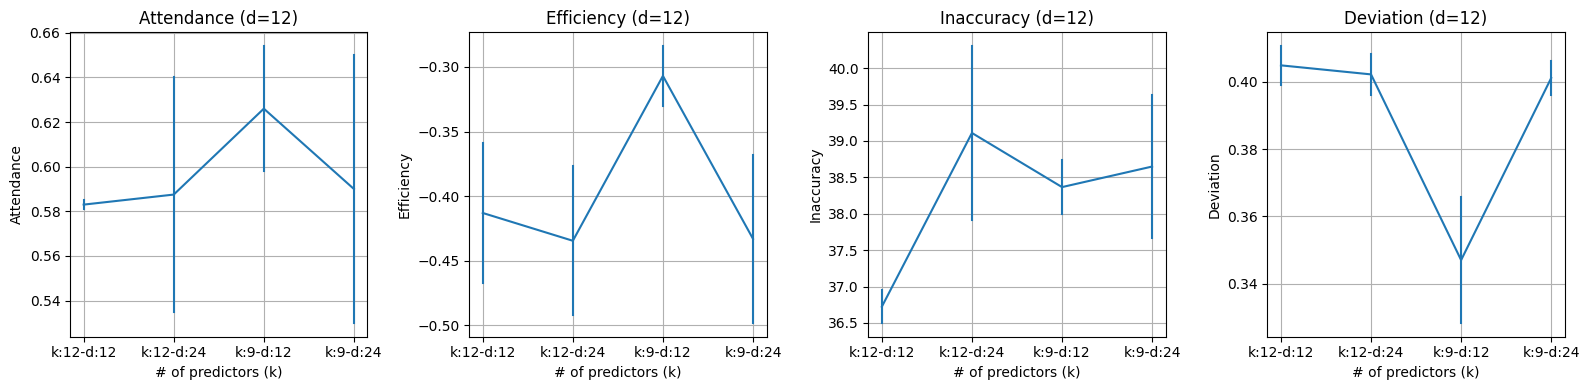

In [ ]:
fig, ax = plt.subplots(
    1,4, 
    figsize=(16, 4), 
    tight_layout=True
)

variables = ['Attendance', 'Efficiency', 'Inaccuracy', 'Deviation']
d = ds[0]

for i, v in enumerate(variables):
    sns.lineplot(
        x='Num_predictors', y=v,
        data=data,
        ax=ax[i],
        err_style="bars",ci=95
    )
    ax[i].set_ylabel(v)
    ax[i].set_xlabel('# of predictors (k)')
    ax[i].set_title(f"{v} (d={d})")
    ax[i].grid()

---

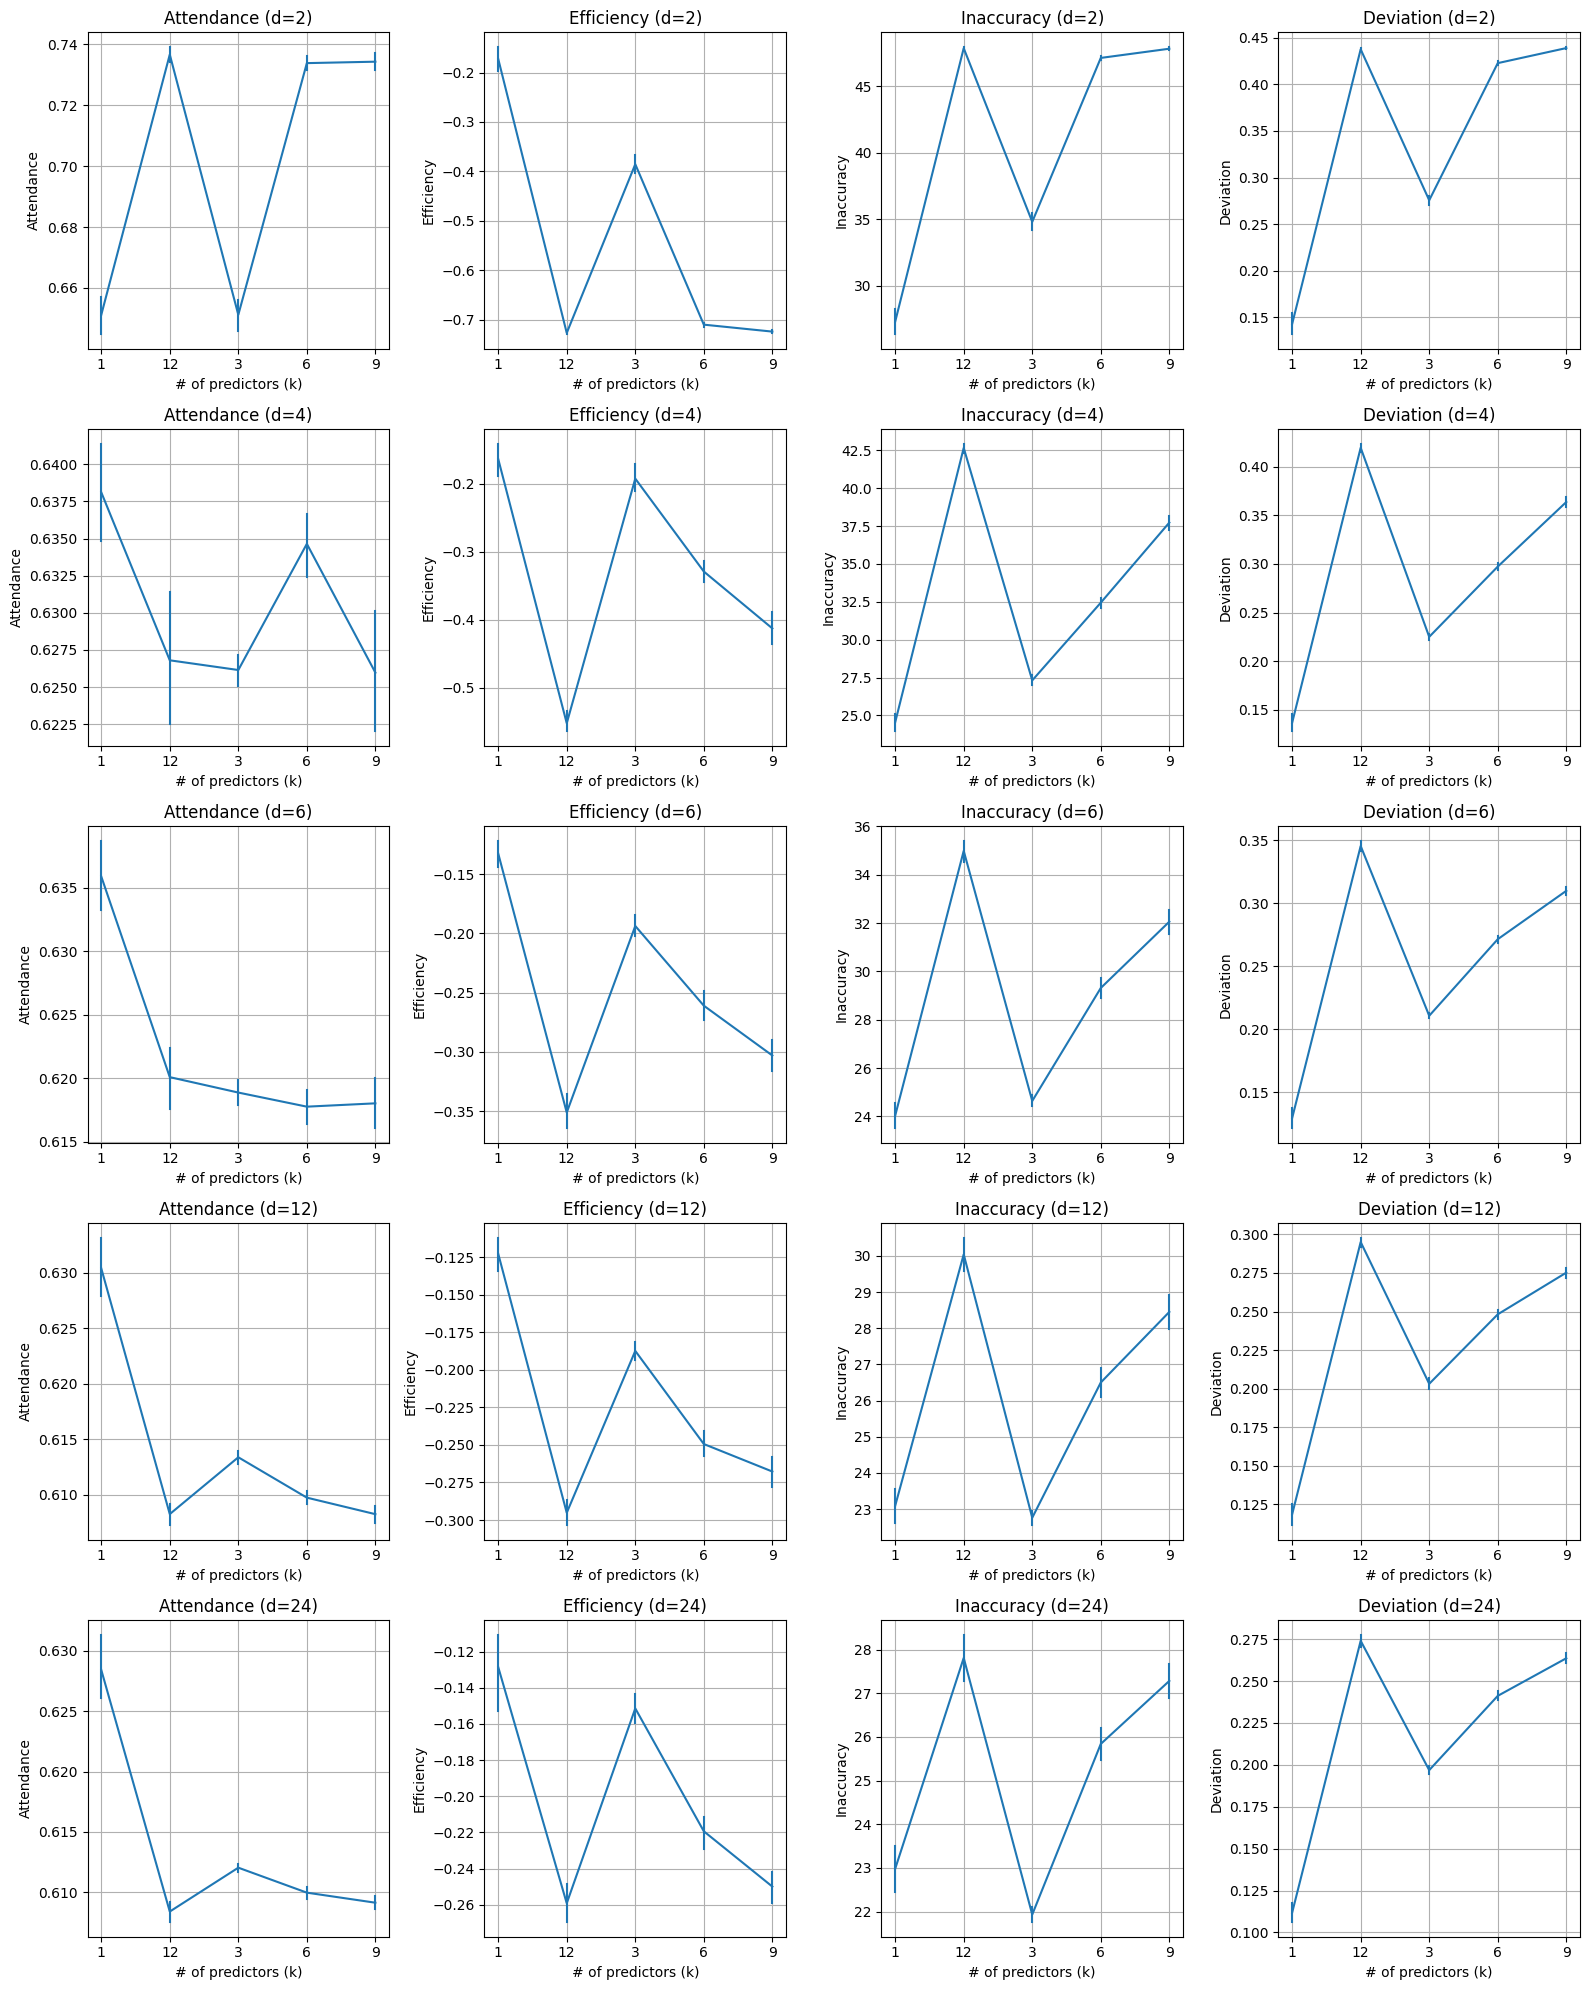

In [56]:
variables = ['Attendance', 'Efficiency', 'Inaccuracy', 'Deviation']

fig, ax = plt.subplots(
    len(ds), len(variables), 
    figsize=(4*len(variables), 4*len(ds)), 
    tight_layout=True
)

for j, d in enumerate(ds):
    data_d = data[data['Memory'] == str(d)]
    for i, v in enumerate(variables):
        sns.lineplot(
            x='Num_predictors', y=v,
            data=data_d,
            ax=ax[j,i],
            err_style="bars",ci=95
        )
        ax[j,i].set_ylabel(v)
        ax[j,i].set_xlabel('# of predictors (k)')
        ax[j,i].set_title(f"{v} (d={d})")
        ax[j,i].grid()